In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import sys
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, make_scorer
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

## Loading Dataset

In [2]:
df = pd.read_csv('sensor.csv')
df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


# Splitting the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [4]:
# Separating independent variables
X = df.iloc[:,:-1]
X

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856


In [5]:
# Separating dependent/target variable
y = df.iloc[:,-1:]
y

,machine_status
0,NORMAL
1,NORMAL
2,NORMAL
3,NORMAL
4,NORMAL
...,...
220315,NORMAL
220316,NORMAL
220317,NORMAL
220318,NORMAL


In [6]:
# Splitting train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [7]:
# Checking target variable for data imbalance
y_train.value_counts()

machine_status
NORMAL            164692
RECOVERING         11559
BROKEN                 5
dtype: int64

In [8]:
# Checking target variable for data imbalance
y_test.value_counts()

machine_status
NORMAL            41144
RECOVERING         2918
BROKEN                2
dtype: int64

In [9]:
# Transforming machine status from strings to integers 
# Encoding target variable
conditions = [(y_train['machine_status'] =='NORMAL'), (y_train['machine_status'] =='BROKEN'), (y_train['machine_status'] =='RECOVERING')]
choices = [0, 1, 1]
y_train['status'] = np.select(conditions, choices, default=1)
y_train.drop(['machine_status'], axis=1, inplace=True)
y_train

,status
155030,0
212466,0
11058,0
208597,0
171817,0
...,...
93176,0
211109,0
30727,0
112859,0


In [10]:
# Transforming mashine status from strings to integers 
# Encoding target variable
conditions = [(y_test['machine_status'] =='NORMAL'), (y_test['machine_status'] =='BROKEN'), (y_test['machine_status'] =='RECOVERING')]
choices = [0, 1, 1]
y_test['status'] = np.select(conditions, choices, default=1)
y_test.drop(['machine_status'], axis=1, inplace=True)
y_test

,status
217059,0
135724,1
51574,0
49462,0
184399,0
...,...
179089,0
135843,1
42511,0
5421,0


In [11]:
y_train.status.value_counts()

0    164692
1     11564
Name: status, dtype: int64

In [12]:
y_test.status.value_counts()

0    41144
1     2920
Name: status, dtype: int64

In [13]:
# Joining train_df for further process
train_df = pd.concat([X_train, y_train], axis=1)
train_df.reset_index(drop=True, inplace=True)
train_df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,status
0,155030,2018-07-17 15:50:00,1.512095,50.607640,49.348960,42.708330,459.924774,59.63473,13.84549,16.20370,...,40.10416,46.585650,62.789350,82.75463,63.36805,180.55560,53.240740,NaN,235.8218,0
1,212466,2018-08-26 13:06:00,2.402431,51.822914,52.951385,46.050346,629.861100,72.48574,15.01013,16.60880,...,43.22916,54.687500,43.402780,44.84954,41.08796,198.20600,74.363430,NaN,248.8426,0
2,11058,2018-04-08 16:18:00,2.445718,44.574650,49.045140,42.534721,628.587900,84.42126,13.09317,16.16753,...,37.76041,41.666670,46.585650,39.06250,40.50926,131.36570,53.240740,195.3125,198.4954,0
3,208597,2018-08-23 20:37:00,2.507697,47.526039,51.605900,42.795140,629.976800,74.08862,15.04630,16.65220,...,44.27083,43.113430,38.773150,46.58565,42.53472,276.33100,53.240740,NaN,184.0278,0
4,171817,2018-07-29 07:37:00,2.504745,48.350693,51.649300,45.182289,635.300903,73.21915,14.56887,17.66493,...,50.00000,48.321760,43.402780,110.53240,55.26620,217.59260,45.138889,NaN,123.5532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176251,93176,2018-06-04 16:56:00,2.456539,51.258680,53.559025,43.793400,632.523100,82.26115,13.32465,15.63223,...,55.98958,43.981480,43.692130,52.08333,45.42824,99.53703,52.372684,210.3588,136.5741,0
176252,211109,2018-08-25 14:29:00,2.455556,51.909721,52.690970,46.527775,631.018500,78.02249,14.60503,16.13136,...,49.21875,53.530090,41.087960,55.26620,41.08796,324.36340,111.979200,NaN,240.4514,0
176253,30727,2018-04-22 08:07:00,2.405382,48.567710,52.821180,45.312500,642.939800,79.18988,13.53443,16.24711,...,42.96875,39.641200,40.509258,38.77315,39.35185,84.49074,48.900463,175.0579,180.8449,0
176254,112859,2018-06-18 08:59:00,2.460474,50.390620,51.085068,44.010414,625.115700,78.41136,14.17101,15.62500,...,44.53125,42.534720,39.062500,41.95602,43.40278,111.68980,51.215280,202.5463,183.4491,0


In [14]:
# Joining test_df for further process
test_df = pd.concat([X_test, y_test], axis=1)
test_df.reset_index(drop=True, inplace=True)
test_df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,status
0,217059,2018-08-29 17:39:00,2.436863,48.394100,52.734371,44.878471,628.512700,82.59187,14.937790,16.652200,...,41.40625,50.636570,53.240740,64.236110,46.006940,279.513900,96.932870,NaN,223.090300,0
1,135724,2018-07-04 06:04:00,0.001968,37.196178,34.592014,38.237850,203.220474,0.00000,0.028935,0.036169,...,55.20833,29.513889,30.381945,39.062500,38.773148,27.488426,27.777779,28.067129,28.067129,1
2,51574,2018-05-06 19:34:00,2.453588,49.218750,54.210068,46.918400,636.689800,72.41217,13.556130,16.210940,...,40.10416,48.900460,45.138890,46.875000,41.666670,185.763900,65.104160,231.770800,199.942100,0
3,49462,2018-05-05 08:22:00,2.455556,46.484380,51.258680,44.010414,639.583400,80.97032,13.201680,16.131360,...,39.06250,32.986111,36.168980,37.615742,36.458332,175.347200,54.687500,231.192100,203.125000,0
4,184399,2018-08-07 01:19:00,2.451620,49.001736,51.822914,44.227430,632.060181,66.86974,15.089700,16.702840,...,52.60416,46.585650,55.266200,87.094910,51.793980,153.356500,52.662040,NaN,169.560200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44059,179089,2018-08-03 08:49:00,2.453588,48.394096,49.652770,44.531250,639.004639,64.54141,14.648440,16.753470,...,44.27083,40.798610,40.219910,56.423610,42.534720,277.777800,58.159721,NaN,201.678200,0
44060,135843,2018-07-04 08:03:00,0.001968,37.803820,34.939236,38.498264,201.484360,0.00000,0.028935,0.036169,...,54.68750,30.092590,30.671297,38.773150,36.747684,28.645834,28.067130,28.645834,28.935184,1
44061,42511,2018-04-30 12:31:00,2.470313,47.092010,52.083330,43.923611,632.523100,67.81093,13.505500,16.066260,...,51.30208,43.692130,46.006940,58.159720,49.479170,136.284700,60.763890,212.963000,202.835600,0
44062,5421,2018-04-04 18:21:00,2.460474,48.784720,51.432290,44.357640,637.731400,72.07818,13.411460,16.608800,...,35.41666,50.925930,36.168980,36.168980,36.168980,179.398100,53.240740,229.166700,192.708300,0


In [15]:
train_df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,status
0,155030,2018-07-17 15:50:00,1.512095,50.607640,49.348960,42.708330,459.924774,59.63473,13.84549,16.20370,...,40.10416,46.585650,62.789350,82.75463,63.36805,180.55560,53.240740,NaN,235.8218,0
1,212466,2018-08-26 13:06:00,2.402431,51.822914,52.951385,46.050346,629.861100,72.48574,15.01013,16.60880,...,43.22916,54.687500,43.402780,44.84954,41.08796,198.20600,74.363430,NaN,248.8426,0
2,11058,2018-04-08 16:18:00,2.445718,44.574650,49.045140,42.534721,628.587900,84.42126,13.09317,16.16753,...,37.76041,41.666670,46.585650,39.06250,40.50926,131.36570,53.240740,195.3125,198.4954,0
3,208597,2018-08-23 20:37:00,2.507697,47.526039,51.605900,42.795140,629.976800,74.08862,15.04630,16.65220,...,44.27083,43.113430,38.773150,46.58565,42.53472,276.33100,53.240740,NaN,184.0278,0
4,171817,2018-07-29 07:37:00,2.504745,48.350693,51.649300,45.182289,635.300903,73.21915,14.56887,17.66493,...,50.00000,48.321760,43.402780,110.53240,55.26620,217.59260,45.138889,NaN,123.5532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176251,93176,2018-06-04 16:56:00,2.456539,51.258680,53.559025,43.793400,632.523100,82.26115,13.32465,15.63223,...,55.98958,43.981480,43.692130,52.08333,45.42824,99.53703,52.372684,210.3588,136.5741,0
176252,211109,2018-08-25 14:29:00,2.455556,51.909721,52.690970,46.527775,631.018500,78.02249,14.60503,16.13136,...,49.21875,53.530090,41.087960,55.26620,41.08796,324.36340,111.979200,NaN,240.4514,0
176253,30727,2018-04-22 08:07:00,2.405382,48.567710,52.821180,45.312500,642.939800,79.18988,13.53443,16.24711,...,42.96875,39.641200,40.509258,38.77315,39.35185,84.49074,48.900463,175.0579,180.8449,0
176254,112859,2018-06-18 08:59:00,2.460474,50.390620,51.085068,44.010414,625.115700,78.41136,14.17101,15.62500,...,44.53125,42.534720,39.062500,41.95602,43.40278,111.68980,51.215280,202.5463,183.4491,0


In [16]:
rename_cols = ["Pressure Sensor", "Oil Pressure Switch","Level Sensor","Temperature Sensor", "Oil Quality Sensor", "Flow Sensor", "Oil Filter Differential Pressure Sensor", "Oil Pump RPM Sensor",
"Oil Pump Control Solenoid", "Oil Pump Position Sensor", "Oil Cooler Temperature Sensor",
"Oil Pressure Relief Valve", "Low Oil Level Warning Sensor", "Oil Pump Gasket Pressure Sensor" ,"Oil Pump Vibration Sensor", "Oil Pump Control Module", "Oil Pump Drive Belt Tension Sensor", "Oil Pump Relay", "Density Sensor", "Viscosity Sensors", "pH Sensors", "H2S Gas Sensors", "Gas Detectors", "Particle Count Sensors", "Ultrasonic Sensors", "Smoke and Fire Detectors", "Tank Gauging Systems","Oil Level Sensor",
    "Oil Temperature Sensor",
    "Tank Pressure Sensor",
    "Oil Flow Rate Sensor",
    "Tank Temperature Sensor",
    "Oil Quality Analyzer",
    "Tank Capacity Sensor",
    "Oil Contaminant Sensor",
    "Oil Sediment Sensor",
    "Oil Density Analyzer",
    "Tank Fill Rate Sensor",
    "Oil Foam Sensor",
    "Tank Safety Sensor",
    "Oil Settling Rate Sensor",
    "Tank Corrosion Sensor",
    "Oil Moisture Sensor",
    "Tank Vibration Sensor",
    "Tank Overfill Sensor",
    "Oil Agitation Sensor",
    "Oil Filtration Sensor",
    "Tank Mixing Sensor",
    "Oil Pressure Regulator",
    "Tank Level Indicator",
    "Oil Containment Sensor",
    "Tank Cleaning Sensor"]

In [17]:
# column names
old_cols = train_df.columns[2:-1]

# New column names
new_cols = rename_cols + [f'sensor_{str(i).zfill(2)}' for i in range(len(rename_cols), 52)]

# Rename the columns in your DataFrame
train_df.columns = ['Unnamed: 0', 'timestamp'] + new_cols + ['status']
train_df

,Unnamed: 0,timestamp,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,...,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor,status
0,155030,2018-07-17 15:50:00,1.512095,50.607640,49.348960,42.708330,459.924774,59.63473,13.84549,16.20370,...,40.10416,46.585650,62.789350,82.75463,63.36805,180.55560,53.240740,NaN,235.8218,0
1,212466,2018-08-26 13:06:00,2.402431,51.822914,52.951385,46.050346,629.861100,72.48574,15.01013,16.60880,...,43.22916,54.687500,43.402780,44.84954,41.08796,198.20600,74.363430,NaN,248.8426,0
2,11058,2018-04-08 16:18:00,2.445718,44.574650,49.045140,42.534721,628.587900,84.42126,13.09317,16.16753,...,37.76041,41.666670,46.585650,39.06250,40.50926,131.36570,53.240740,195.3125,198.4954,0
3,208597,2018-08-23 20:37:00,2.507697,47.526039,51.605900,42.795140,629.976800,74.08862,15.04630,16.65220,...,44.27083,43.113430,38.773150,46.58565,42.53472,276.33100,53.240740,NaN,184.0278,0
4,171817,2018-07-29 07:37:00,2.504745,48.350693,51.649300,45.182289,635.300903,73.21915,14.56887,17.66493,...,50.00000,48.321760,43.402780,110.53240,55.26620,217.59260,45.138889,NaN,123.5532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176251,93176,2018-06-04 16:56:00,2.456539,51.258680,53.559025,43.793400,632.523100,82.26115,13.32465,15.63223,...,55.98958,43.981480,43.692130,52.08333,45.42824,99.53703,52.372684,210.3588,136.5741,0
176252,211109,2018-08-25 14:29:00,2.455556,51.909721,52.690970,46.527775,631.018500,78.02249,14.60503,16.13136,...,49.21875,53.530090,41.087960,55.26620,41.08796,324.36340,111.979200,NaN,240.4514,0
176253,30727,2018-04-22 08:07:00,2.405382,48.567710,52.821180,45.312500,642.939800,79.18988,13.53443,16.24711,...,42.96875,39.641200,40.509258,38.77315,39.35185,84.49074,48.900463,175.0579,180.8449,0
176254,112859,2018-06-18 08:59:00,2.460474,50.390620,51.085068,44.010414,625.115700,78.41136,14.17101,15.62500,...,44.53125,42.534720,39.062500,41.95602,43.40278,111.68980,51.215280,202.5463,183.4491,0


In [18]:
# column names
old_cols = test_df.columns[2:-1]

# New column names
new_cols = rename_cols + [f'sensor_{str(i).zfill(2)}' for i in range(len(rename_cols), 52)]

# Rename the columns in your DataFrame
test_df.columns = ['Unnamed: 0', 'timestamp'] + new_cols + ['status']
test_df

,Unnamed: 0,timestamp,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,...,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor,status
0,217059,2018-08-29 17:39:00,2.436863,48.394100,52.734371,44.878471,628.512700,82.59187,14.937790,16.652200,...,41.40625,50.636570,53.240740,64.236110,46.006940,279.513900,96.932870,NaN,223.090300,0
1,135724,2018-07-04 06:04:00,0.001968,37.196178,34.592014,38.237850,203.220474,0.00000,0.028935,0.036169,...,55.20833,29.513889,30.381945,39.062500,38.773148,27.488426,27.777779,28.067129,28.067129,1
2,51574,2018-05-06 19:34:00,2.453588,49.218750,54.210068,46.918400,636.689800,72.41217,13.556130,16.210940,...,40.10416,48.900460,45.138890,46.875000,41.666670,185.763900,65.104160,231.770800,199.942100,0
3,49462,2018-05-05 08:22:00,2.455556,46.484380,51.258680,44.010414,639.583400,80.97032,13.201680,16.131360,...,39.06250,32.986111,36.168980,37.615742,36.458332,175.347200,54.687500,231.192100,203.125000,0
4,184399,2018-08-07 01:19:00,2.451620,49.001736,51.822914,44.227430,632.060181,66.86974,15.089700,16.702840,...,52.60416,46.585650,55.266200,87.094910,51.793980,153.356500,52.662040,NaN,169.560200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44059,179089,2018-08-03 08:49:00,2.453588,48.394096,49.652770,44.531250,639.004639,64.54141,14.648440,16.753470,...,44.27083,40.798610,40.219910,56.423610,42.534720,277.777800,58.159721,NaN,201.678200,0
44060,135843,2018-07-04 08:03:00,0.001968,37.803820,34.939236,38.498264,201.484360,0.00000,0.028935,0.036169,...,54.68750,30.092590,30.671297,38.773150,36.747684,28.645834,28.067130,28.645834,28.935184,1
44061,42511,2018-04-30 12:31:00,2.470313,47.092010,52.083330,43.923611,632.523100,67.81093,13.505500,16.066260,...,51.30208,43.692130,46.006940,58.159720,49.479170,136.284700,60.763890,212.963000,202.835600,0
44062,5421,2018-04-04 18:21:00,2.460474,48.784720,51.432290,44.357640,637.731400,72.07818,13.411460,16.608800,...,35.41666,50.925930,36.168980,36.168980,36.168980,179.398100,53.240740,229.166700,192.708300,0


In [19]:
# Exporting train and test dfs
train_df.to_csv('sensor_train_master.csv', index=False)
test_df.to_csv('sensor_test_master.csv', index=False)

## Basic Preprocessing of train dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import sys
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, make_scorer
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [21]:
train = pd.read_csv('sensor_train_master.csv')
train

,Unnamed: 0,timestamp,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,...,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor,status
0,155030,2018-07-17 15:50:00,1.512095,50.607640,49.348960,42.708330,459.924774,59.63473,13.84549,16.20370,...,40.10416,46.585650,62.789350,82.75463,63.36805,180.55560,53.240740,NaN,235.8218,0
1,212466,2018-08-26 13:06:00,2.402431,51.822914,52.951385,46.050346,629.861100,72.48574,15.01013,16.60880,...,43.22916,54.687500,43.402780,44.84954,41.08796,198.20600,74.363430,NaN,248.8426,0
2,11058,2018-04-08 16:18:00,2.445718,44.574650,49.045140,42.534721,628.587900,84.42126,13.09317,16.16753,...,37.76041,41.666670,46.585650,39.06250,40.50926,131.36570,53.240740,195.3125,198.4954,0
3,208597,2018-08-23 20:37:00,2.507697,47.526039,51.605900,42.795140,629.976800,74.08862,15.04630,16.65220,...,44.27083,43.113430,38.773150,46.58565,42.53472,276.33100,53.240740,NaN,184.0278,0
4,171817,2018-07-29 07:37:00,2.504745,48.350693,51.649300,45.182289,635.300903,73.21915,14.56887,17.66493,...,50.00000,48.321760,43.402780,110.53240,55.26620,217.59260,45.138889,NaN,123.5532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176251,93176,2018-06-04 16:56:00,2.456539,51.258680,53.559025,43.793400,632.523100,82.26115,13.32465,15.63223,...,55.98958,43.981480,43.692130,52.08333,45.42824,99.53703,52.372684,210.3588,136.5741,0
176252,211109,2018-08-25 14:29:00,2.455556,51.909721,52.690970,46.527775,631.018500,78.02249,14.60503,16.13136,...,49.21875,53.530090,41.087960,55.26620,41.08796,324.36340,111.979200,NaN,240.4514,0
176253,30727,2018-04-22 08:07:00,2.405382,48.567710,52.821180,45.312500,642.939800,79.18988,13.53443,16.24711,...,42.96875,39.641200,40.509258,38.77315,39.35185,84.49074,48.900463,175.0579,180.8449,0
176254,112859,2018-06-18 08:59:00,2.460474,50.390620,51.085068,44.010414,625.115700,78.41136,14.17101,15.62500,...,44.53125,42.534720,39.062500,41.95602,43.40278,111.68980,51.215280,202.5463,183.4491,0


In [22]:
train.columns

Index(['Unnamed: 0', 'timestamp', 'Pressure Sensor', 'Oil Pressure Switch',
       'Level Sensor', 'Temperature Sensor', 'Oil Quality Sensor',
       'Flow Sensor', 'Oil Filter Differential Pressure Sensor',
       'Oil Pump RPM Sensor', 'Oil Pump Control Solenoid',
       'Oil Pump Position Sensor', 'Oil Cooler Temperature Sensor',
       'Oil Pressure Relief Valve', 'Low Oil Level Warning Sensor',
       'Oil Pump Gasket Pressure Sensor', 'Oil Pump Vibration Sensor',
       'Oil Pump Control Module', 'Oil Pump Drive Belt Tension Sensor',
       'Oil Pump Relay', 'Density Sensor', 'Viscosity Sensors', 'pH Sensors',
       'H2S Gas Sensors', 'Gas Detectors', 'Particle Count Sensors',
       'Ultrasonic Sensors', 'Smoke and Fire Detectors',
       'Tank Gauging Systems', 'Oil Level Sensor', 'Oil Temperature Sensor',
       'Tank Pressure Sensor', 'Oil Flow Rate Sensor',
       'Tank Temperature Sensor', 'Oil Quality Analyzer',
       'Tank Capacity Sensor', 'Oil Contaminant Sensor', 'Oi

In [23]:
# method to drop duplicate rows
def drop_duplicate_rows(df):
    try:
        if len(df[df.duplicated()]) > 0:
            df.drop_duplicates(keep='first', inplace=True)

    except Exception as e:
        print("drop_duplicate_rows failed because of : {}".format(e))
        raise Exception("drop_duplicate_rows failed because of : {}".format(e))
    
    
# dropping duplicate rows
drop_duplicate_rows(train)

In [24]:
train_y = train.iloc[:,-1:]
train_y

,status
0,0
1,0
2,0
3,0
4,0
...,...
176251,0
176252,0
176253,0
176254,0


In [25]:
train = train.iloc[:,:-1]
train

,Unnamed: 0,timestamp,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,...,Oil Moisture Sensor,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor
0,155030,2018-07-17 15:50:00,1.512095,50.607640,49.348960,42.708330,459.924774,59.63473,13.84549,16.20370,...,31.770830,40.10416,46.585650,62.789350,82.75463,63.36805,180.55560,53.240740,NaN,235.8218
1,212466,2018-08-26 13:06:00,2.402431,51.822914,52.951385,46.050346,629.861100,72.48574,15.01013,16.60880,...,34.375000,43.22916,54.687500,43.402780,44.84954,41.08796,198.20600,74.363430,NaN,248.8426
2,11058,2018-04-08 16:18:00,2.445718,44.574650,49.045140,42.534721,628.587900,84.42126,13.09317,16.16753,...,31.770830,37.76041,41.666670,46.585650,39.06250,40.50926,131.36570,53.240740,195.3125,198.4954
3,208597,2018-08-23 20:37:00,2.507697,47.526039,51.605900,42.795140,629.976800,74.08862,15.04630,16.65220,...,30.989580,44.27083,43.113430,38.773150,46.58565,42.53472,276.33100,53.240740,NaN,184.0278
4,171817,2018-07-29 07:37:00,2.504745,48.350693,51.649300,45.182289,635.300903,73.21915,14.56887,17.66493,...,35.677080,50.00000,48.321760,43.402780,110.53240,55.26620,217.59260,45.138889,NaN,123.5532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176251,93176,2018-06-04 16:56:00,2.456539,51.258680,53.559025,43.793400,632.523100,82.26115,13.32465,15.63223,...,42.187500,55.98958,43.981480,43.692130,52.08333,45.42824,99.53703,52.372684,210.3588,136.5741
176252,211109,2018-08-25 14:29:00,2.455556,51.909721,52.690970,46.527775,631.018500,78.02249,14.60503,16.13136,...,34.895832,49.21875,53.530090,41.087960,55.26620,41.08796,324.36340,111.979200,NaN,240.4514
176253,30727,2018-04-22 08:07:00,2.405382,48.567710,52.821180,45.312500,642.939800,79.18988,13.53443,16.24711,...,37.760410,42.96875,39.641200,40.509258,38.77315,39.35185,84.49074,48.900463,175.0579,180.8449
176254,112859,2018-06-18 08:59:00,2.460474,50.390620,51.085068,44.010414,625.115700,78.41136,14.17101,15.62500,...,36.458332,44.53125,42.534720,39.062500,41.95602,43.40278,111.68980,51.215280,202.5463,183.4491


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176256 entries, 0 to 176255
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               176256 non-null  int64  
 1   timestamp                                176256 non-null  object 
 2   Pressure Sensor                          168123 non-null  float64
 3   Oil Pressure Switch                      175971 non-null  float64
 4   Level Sensor                             176241 non-null  float64
 5   Temperature Sensor                       176241 non-null  float64
 6   Oil Quality Sensor                       176241 non-null  float64
 7   Flow Sensor                              176241 non-null  float64
 8   Oil Filter Differential Pressure Sensor  172460 non-null  float64
 9   Oil Pump RPM Sensor                      171918 non-null  float64
 10  Oil Pump Control Solenoid       

In [27]:
train.describe()

,Unnamed: 0,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,Oil Pump Control Solenoid,...,Oil Moisture Sensor,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor
count,176256.000000,168123.000000,175971.000000,176241.000000,176241.000000,176241.000000,176241.000000,172460.000000,171918.000000,172206.000000,...,176235.000000,176235.000000,176235.000000,176235.000000,176235.000000,176235.000000,176235.000000,176235.000000,114641.000000,163965.000000
mean,110113.436280,2.371999,47.594466,50.866387,43.751986,590.761316,73.372570,13.499739,15.843368,15.202001,...,35.449403,43.879830,42.667118,43.099547,48.010931,44.348819,150.889208,57.120874,183.109863,202.618693
std,63620.225723,0.412869,3.290299,3.660293,2.417159,143.823638,17.313399,2.168366,2.200593,2.034644,...,10.110697,10.978449,11.513677,12.840264,15.543352,10.463326,82.188043,19.135264,65.281914,109.479998
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,54885.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.958940,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110196.500000,2.456539,48.133678,51.649300,44.227428,632.754600,75.555820,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165281.750000,2.499826,49.479160,52.777770,45.312500,637.615700,80.903890,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [28]:
train.isnull().sum()

Unnamed: 0                                      0
timestamp                                       0
Pressure Sensor                              8133
Oil Pressure Switch                           285
Level Sensor                                   15
Temperature Sensor                             15
Oil Quality Sensor                             15
Flow Sensor                                    15
Oil Filter Differential Pressure Sensor      3796
Oil Pump RPM Sensor                          4338
Oil Pump Control Solenoid                    4050
Oil Pump Position Sensor                     3633
Oil Cooler Temperature Sensor                  15
Oil Pressure Relief Valve                      15
Low Oil Level Warning Sensor                   15
Oil Pump Gasket Pressure Sensor                15
Oil Pump Vibration Sensor                      17
Oil Pump Control Module                    176256
Oil Pump Drive Belt Tension Sensor             25
Oil Pump Relay                                 39


In [29]:
# Dropping cols with high nulls - same we need to drop in test set as well (IMPORTANT)
train.drop(['timestamp', 'Oil Pump Control Module','Oil Containment Sensor','Tank Cleaning Sensor'], axis=1, inplace=True)
train

,Unnamed: 0,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,Oil Pump Control Solenoid,...,Oil Settling Rate Sensor,Tank Corrosion Sensor,Oil Moisture Sensor,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator
0,155030,1.512095,50.607640,49.348960,42.708330,459.924774,59.63473,13.84549,16.20370,15.69734,...,65.10416,32.552080,31.770830,40.10416,46.585650,62.789350,82.75463,63.36805,180.55560,53.240740
1,212466,2.402431,51.822914,52.951385,46.050346,629.861100,72.48574,15.01013,16.60880,15.65393,...,79.68750,35.156250,34.375000,43.22916,54.687500,43.402780,44.84954,41.08796,198.20600,74.363430
2,11058,2.445718,44.574650,49.045140,42.534721,628.587900,84.42126,13.09317,16.16753,15.85648,...,62.76041,31.510420,31.770830,37.76041,41.666670,46.585650,39.06250,40.50926,131.36570,53.240740
3,208597,2.507697,47.526039,51.605900,42.795140,629.976800,74.08862,15.04630,16.65220,15.69734,...,93.48958,31.250000,30.989580,44.27083,43.113430,38.773150,46.58565,42.53472,276.33100,53.240740
4,171817,2.504745,48.350693,51.649300,45.182289,635.300903,73.21915,14.56887,17.66493,17.21643,...,83.59375,36.458332,35.677080,50.00000,48.321760,43.402780,110.53240,55.26620,217.59260,45.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176251,93176,2.456539,51.258680,53.559025,43.793400,632.523100,82.26115,13.32465,15.63223,15.07523,...,87.50000,40.885410,42.187500,55.98958,43.981480,43.692130,52.08333,45.42824,99.53703,52.372684
176252,211109,2.455556,51.909721,52.690970,46.527775,631.018500,78.02249,14.60503,16.13136,15.69734,...,89.06250,32.812500,34.895832,49.21875,53.530090,41.087960,55.26620,41.08796,324.36340,111.979200
176253,30727,2.405382,48.567710,52.821180,45.312500,642.939800,79.18988,13.53443,16.24711,15.81308,...,64.06250,34.895830,37.760410,42.96875,39.641200,40.509258,38.77315,39.35185,84.49074,48.900463
176254,112859,2.460474,50.390620,51.085068,44.010414,625.115700,78.41136,14.17101,15.62500,15.37182,...,67.70833,35.677080,36.458332,44.53125,42.534720,39.062500,41.95602,43.40278,111.68980,51.215280


In [30]:
def replace_outliers_with_median_train(df, imputer_file=None):
    """
    Replaces outliers in all numeric columns of a pandas DataFrame with the column median
    using SimpleImputer from scikit-learn. Optionally saves the trained imputer object to disk.
    """
    # Get a list of all numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Create a SimpleImputer object with median strategy
    imputer = SimpleImputer(strategy='median')

    # Loop through each numeric column
    for col in numeric_cols:
        # Calculate the interquartile range (IQR)
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Identify the outliers using the IQR method
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        # Create a copy of the column
        col_copy = df[col].copy()

        # Replace the outliers with NaN
        col_copy[outliers.index] = np.nan

        # Use SimpleImputer to replace NaN values with column median
        imputed_col = imputer.fit_transform(col_copy.values.reshape(-1, 1))

        # Update the original DataFrame with the imputed values
        df.iloc[:, df.columns.get_loc(col)] = imputed_col.flatten()


    # Save the trained imputer object to disk
    if imputer_file is not None:
        joblib.dump(imputer, imputer_file)

    return df



In [31]:
train_preprocessing = replace_outliers_with_median_train(train, 'sensor_outlier_train_imputed.pkl')
train_preprocessing

,Unnamed: 0,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,Oil Pump Control Solenoid,...,Oil Settling Rate Sensor,Tank Corrosion Sensor,Oil Moisture Sensor,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator
0,155030.0,2.459491,50.607640,49.348960,42.708330,633.911987,59.63473,13.84549,16.20370,15.69734,...,65.10416,32.552080,31.770830,40.10416,46.585650,39.641200,43.98148,41.95602,180.55560,53.240740
1,212466.0,2.402431,51.822914,52.951385,46.050346,629.861100,72.48574,15.01013,16.60880,15.65393,...,79.68750,35.156250,34.375000,43.22916,54.687500,43.402780,44.84954,41.08796,198.20600,74.363430
2,11058.0,2.445718,44.574650,49.045140,42.534721,628.587900,84.42126,13.09317,16.16753,15.85648,...,62.76041,31.510420,31.770830,37.76041,41.666670,46.585650,39.06250,40.50926,131.36570,53.240740
3,208597.0,2.507697,47.526039,51.605900,42.795140,629.976800,74.08862,15.04630,16.65220,15.69734,...,93.48958,31.250000,30.989580,44.27083,43.113430,38.773150,46.58565,42.53472,276.33100,53.240740
4,171817.0,2.504745,48.350693,51.649300,45.182289,635.300903,73.21915,14.56887,16.16753,15.49479,...,83.59375,36.458332,35.677080,50.00000,48.321760,43.402780,43.98148,55.26620,217.59260,45.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176251,93176.0,2.456539,51.258680,53.559025,43.793400,632.523100,82.26115,13.32465,15.63223,15.07523,...,87.50000,40.885410,42.187500,55.98958,43.981480,43.692130,52.08333,45.42824,99.53703,52.372684
176252,211109.0,2.455556,51.909721,52.690970,46.527775,631.018500,78.02249,14.60503,16.13136,15.69734,...,89.06250,32.812500,34.895832,49.21875,53.530090,41.087960,55.26620,41.08796,324.36340,52.083330
176253,30727.0,2.405382,48.567710,52.821180,45.312500,642.939800,79.18988,13.53443,16.24711,15.81308,...,64.06250,34.895830,37.760410,42.96875,39.641200,40.509258,38.77315,39.35185,84.49074,48.900463
176254,112859.0,2.460474,50.390620,51.085068,44.010414,625.115700,78.41136,14.17101,15.62500,15.37182,...,67.70833,35.677080,36.458332,44.53125,42.534720,39.062500,41.95602,43.40278,111.68980,51.215280


## Feature Selection - Using VIF (Removing Multicolinearity)

In [32]:
# Remove white spaces from column name
def remove_column_name_whitespaces(df):
#     logger.info('Removing white spaces from column name')
    try:
        df.rename(columns=lambda x: x.strip(), inplace=True)

    except Exception as e:
        print("remove_column_name_whitespaces failed because of : {}".format(e))
#         logger.error("remove_column_name_whitespaces failed because of : {}".format(e))
        raise Exception("remove_column_name_whitespaces failed because of : {}".format(e))
        
        
# method to get high vif feature to handle multi collinearity
def get_high_vif_feature(df, cutoff):
    try:
        vif = pd.DataFrame()
        vif_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
        df_vif = df.loc[:, vif_features]
        vif['Features'] = df_vif.columns
        vif['VIF Factor'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
        vif['VIF Factor'] = vif['VIF Factor'].round(2)
        vif = vif[vif['VIF Factor'] > cutoff]
        features_to_drop = list(vif[vif['VIF Factor'] == vif['VIF Factor'].max()]['Features'])

    except Exception as e:
        print("get_high_vif_feature failed because of : {}".format(e))
#         logger.error("get_high_vif_feature failed because of : {}".format(e))
        raise Exception("get_high_vif_feature failed because of : {}".format(e))

    return features_to_drop


# method to drop high vif feature to remove multi collinearity
def drop_high_vif_features(df, cutoff):
#     logger.info('Dropping high vif features to remove multi collinearity')
    try:
        drop_feature_list = list()
        for i in range(len(df.columns)):
            feature_to_drop = get_high_vif_feature(df, cutoff)
            if len(feature_to_drop) > 0:
#                 logger.info('Dropping high VIF feature : {}'.format(feature_to_drop))
                df.drop(feature_to_drop, axis=1, inplace=True)
                drop_feature_list.extend(feature_to_drop)
            else:
                break

    except Exception as e:
        print("drop_high_vif_features failed because of : {}".format(e))
#         logger.error("drop_high_vif_features failed because of : {}".format(e))
        raise Exception("drop_high_vif_features failed because of : {}".format(e))

    return drop_feature_list

In [33]:
## Further preprocessing
# Remove white spaces from column name
remove_column_name_whitespaces(train_preprocessing)

# dropping features w high vif to avoid multi colinearty
drop_high_vif_features(train_preprocessing, 5)

['pH Sensors',
 'Viscosity Sensors',
 'Oil Pump Position Sensor',
 'Oil Pump Vibration Sensor',
 'Oil Pump Relay',
 'H2S Gas Sensors',
 'Oil Pump Drive Belt Tension Sensor',
 'Oil Quality Sensor',
 'Pressure Sensor',
 'Ultrasonic Sensors',
 'Oil Pump Control Solenoid',
 'Oil Pump RPM Sensor',
 'Level Sensor',
 'Smoke and Fire Detectors',
 'Oil Filter Differential Pressure Sensor',
 'Temperature Sensor',
 'Particle Count Sensors',
 'Density Sensor',
 'Oil Moisture Sensor',
 'Gas Detectors',
 'Oil Flow Rate Sensor',
 'Oil Pressure Switch',
 'Tank Corrosion Sensor',
 'Tank Capacity Sensor',
 'Tank Temperature Sensor',
 'Tank Vibration Sensor',
 'Tank Gauging Systems',
 'Oil Cooler Temperature Sensor',
 'Oil Pressure Relief Valve',
 'Flow Sensor',
 'Oil Agitation Sensor',
 'Tank Mixing Sensor',
 'Oil Level Sensor',
 'Oil Foam Sensor',
 'Tank Overfill Sensor',
 'Tank Safety Sensor',
 'Oil Quality Analyzer',
 'Low Oil Level Warning Sensor',
 'Oil Filtration Sensor',
 'Tank Level Indicator',


In [34]:
col_list_train = train_preprocessing.columns.to_list()
col_list_train

['Oil Pump Gasket Pressure Sensor',
 'Oil Density Analyzer',
 'Tank Fill Rate Sensor']

In [35]:
# Export the col list to a file using pickle
import pickle
with open('col_list_train.pkl', 'wb') as file:
    pickle.dump(col_list_train, file)

# OverSampling

In [36]:
def perform_oversampling(X_train, y_train):
    try:
        smote = SMOTE(random_state=2)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    except Exception as e:
        print("perform_oversampling failed because of : {}".format(e))
        raise Exception("perform_oversampling failed because of : {}".format(e))

    return X_train_res, y_train_res

In [37]:
# Performing SMOTE oversampling
X_train_res, y_train_res = perform_oversampling(train_preprocessing, train_y)

In [38]:
y_train_res.value_counts()

status
0         164692
1         164692
dtype: int64

In [39]:
y_train_res.value_counts()

status
0         164692
1         164692
dtype: int64

# Modeling

### Random Forest Classifier

#### HyperParameter Tuning

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize the RandomForestClassifier
model = RandomForestClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    "max_depth": [3, 5],
    "n_estimators": [50, 500]
}

# Define the scoring function (f1_score in this case)
f1_scorer = make_scorer(f1_score, greater_is_better=True)

# Perform RandomizedSearchCV
rs = RandomizedSearchCV(model, param_distributions=param_dist, random_state=1, scoring=f1_scorer, cv=3)
rs.fit(X_train_res, y_train_res)

print('Best Params: ', rs.best_params_)
print('Best Estimators: ', rs.best_estimator_)

# Access the best estimator (model with best hyperparameters)
best_model = rs.best_estimator_

# Access and print feature importances for the best model
feature_importances = best_model.feature_importances_
print("Feature Importances for Best Model:")
for feature_name, importance in zip(X_train_res.columns, feature_importances):
    print(f"{feature_name}: {importance:.4f}")

Best Params:  {'n_estimators': 50, 'max_depth': 5}
Best Estimators:  RandomForestClassifier(max_depth=5, n_estimators=50)
Feature Importances for Best Model:
Oil Pump Gasket Pressure Sensor: 0.7746
Oil Density Analyzer: 0.1873
Tank Fill Rate Sensor: 0.0381


In [41]:
# OOB Score for 50 estimators (Trees)
forest1 = RandomForestClassifier(n_estimators = 50, max_depth = 5, oob_score = True)
forest1.fit(X_train_res, y_train_res)
print('Score: ', forest1.score(X_train_res, y_train_res))

Score:  0.9863988536176621


In [42]:
# OOB Score for 500 estimators (Trees)
forest = RandomForestClassifier(n_estimators = 500, max_depth = 5, oob_score = True)
forest.fit(X_train_res, y_train_res)
print('Score: ', forest.score(X_train_res, y_train_res))

Score:  0.9869119325771744


### After comparing OOB score for 50 vs 500 estimators(trees) we observe slightly better score for 500 trees. Hence, we go ahead with n_estimators=500

In [43]:
print(rs.best_params_)

{'n_estimators': 50, 'max_depth': 5}


In [44]:
best_estimator_index = rs.best_index_
print("Index of the best estimator:", best_estimator_index)

Index of the best estimator: 2


In [45]:
# Saving best fit model
model = rs.best_estimator_

In [46]:
# writing random forest model to disk
model_path = './'
with(open(model_path + "RandomForestModel" + ".sav", "w")) as fp:
    pass
joblib.dump(model, open(model_path + "RandomForestModel" + ".sav", "wb"))

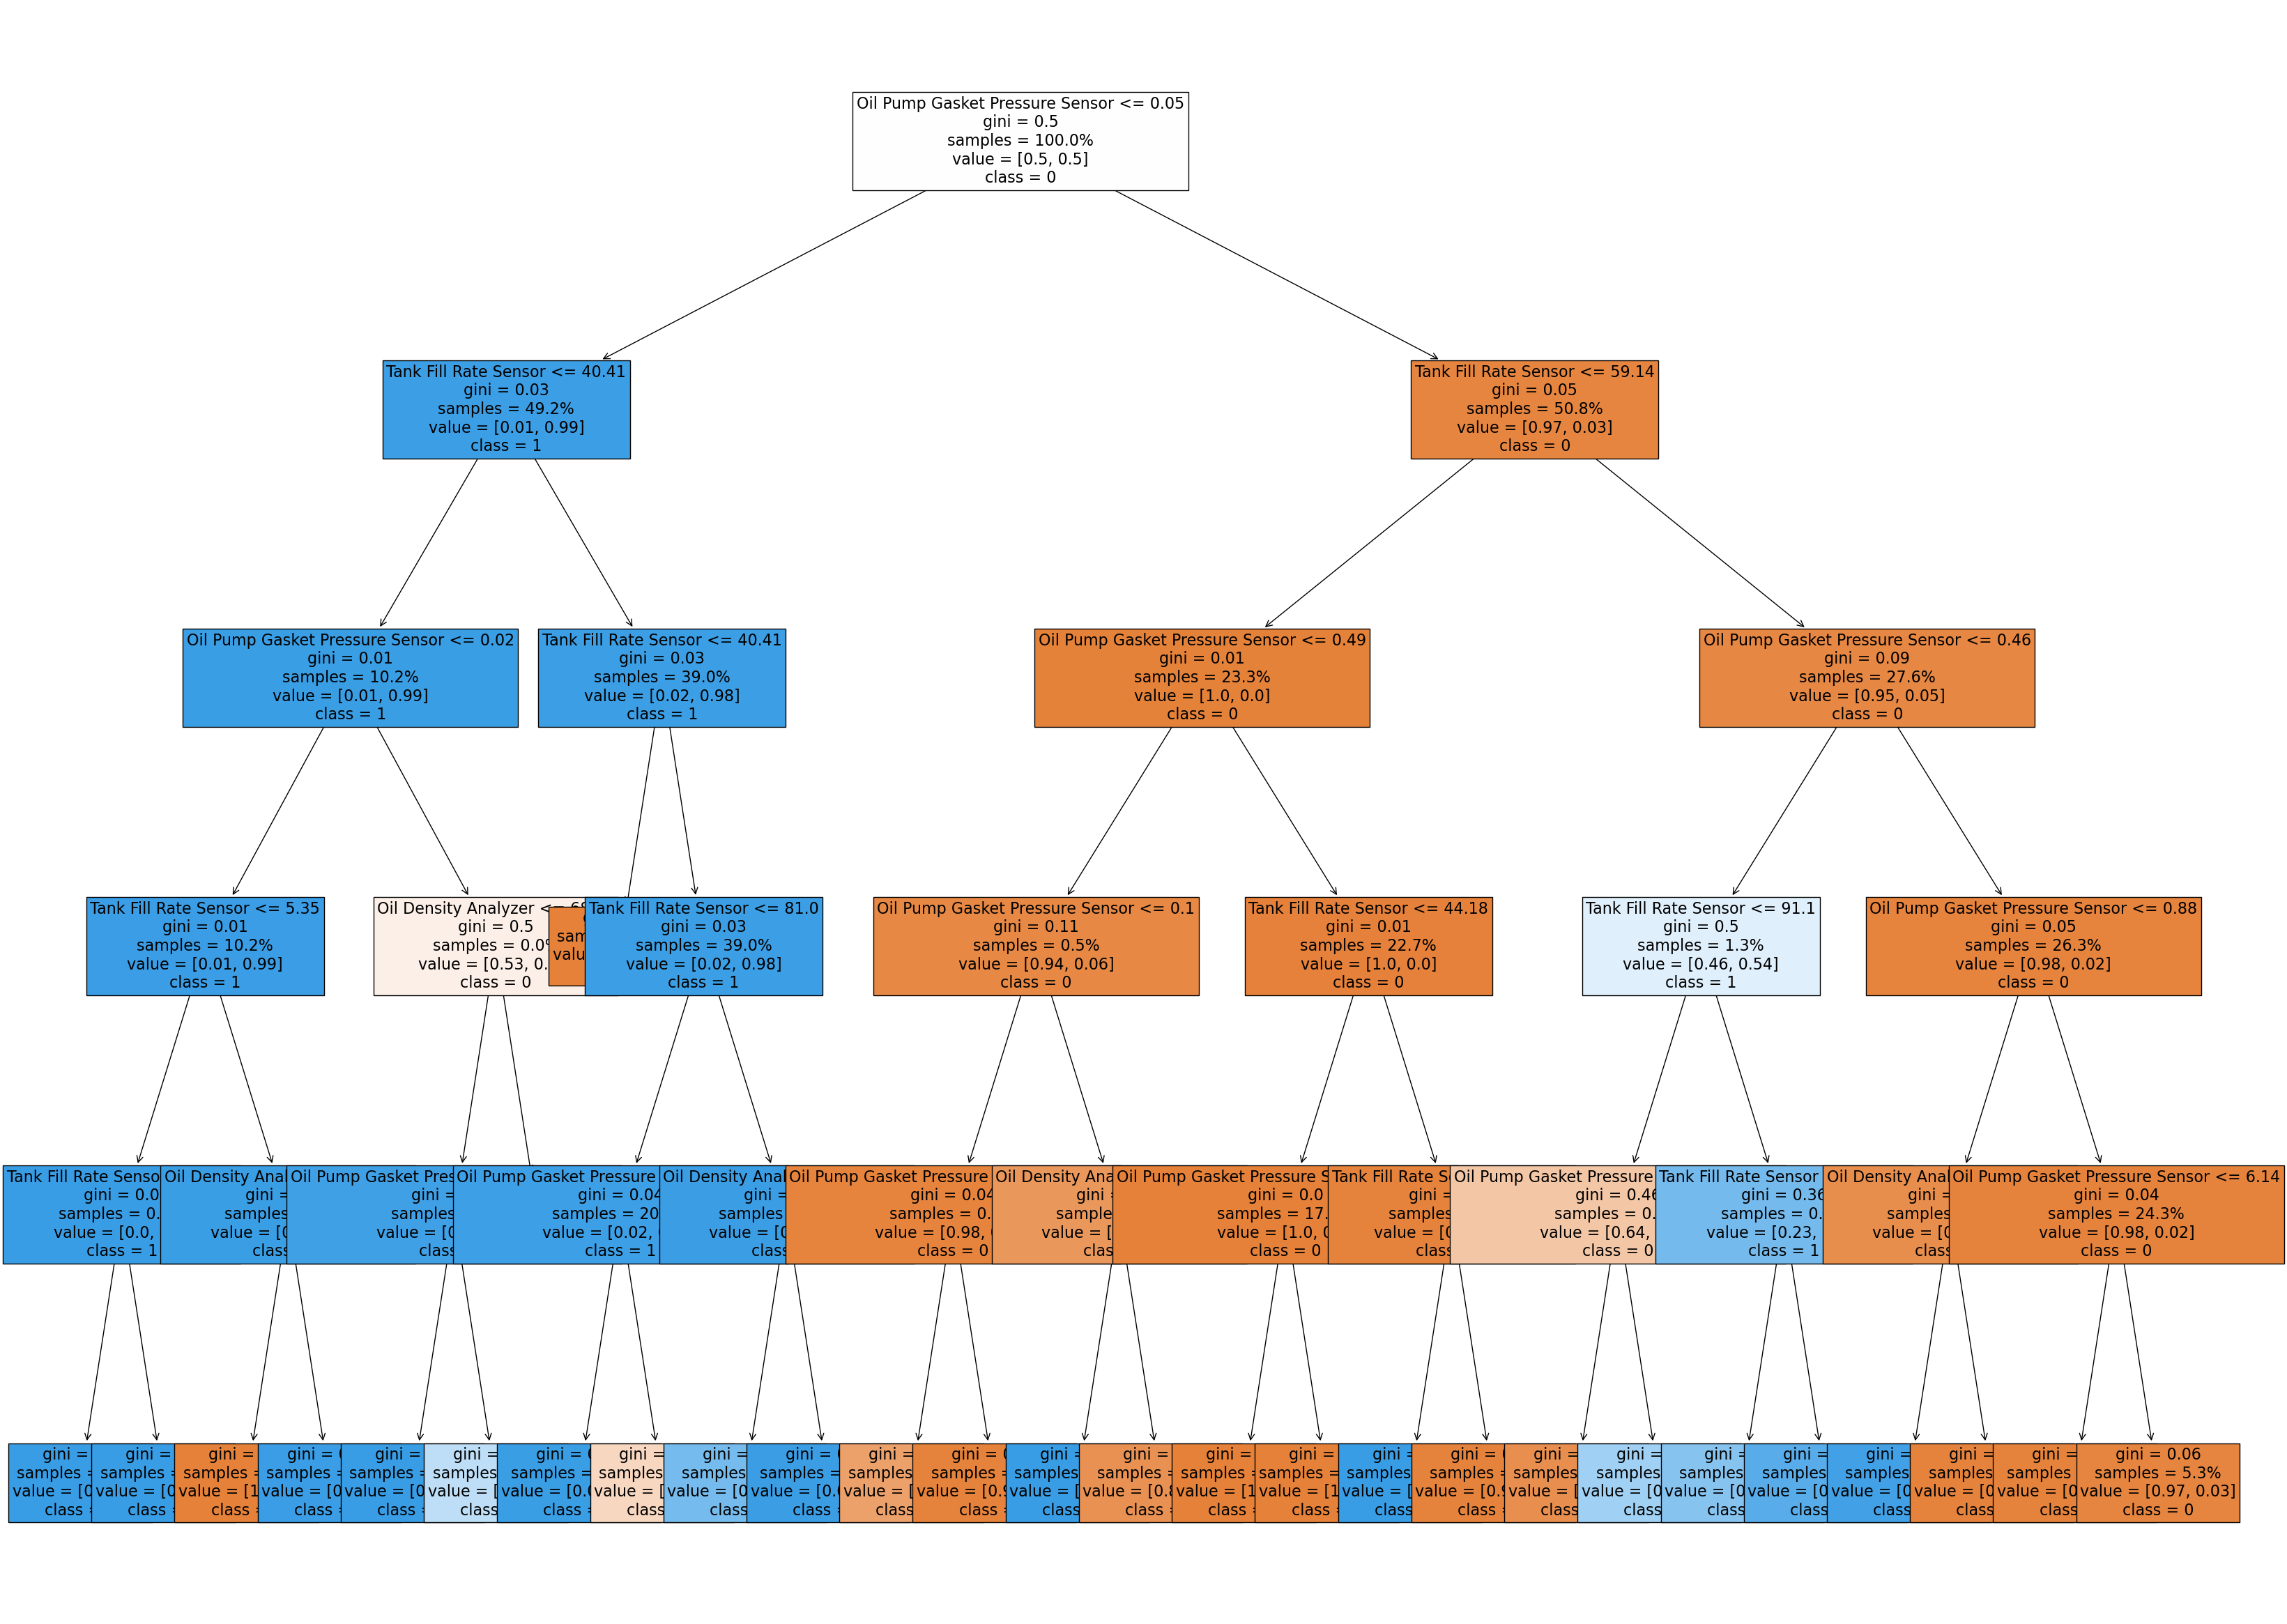

In [47]:
# Viz near to best tree from random forest clf
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import joblib
import matplotlib.pyplot as plt

# Load your trained RandomForest model
model_path = './'
loaded_model = joblib.load(open(model_path + "RandomForestModel" + ".sav", "rb"))

# Choose one of the trees from the RandomForest model (e.g., the first tree)
estimator = loaded_model.estimators_[3]  # Change the index to select a different tree

# Create a larger and clearer plot
plt.figure(figsize=(40, 30))  # Adjust the figsize for a larger plot
plot_tree(estimator, 
          filled=True, 
          feature_names=X_train_res.columns.tolist(), 
          class_names=[str(i) for i in range(2)],
          fontsize=16,  # Adjust the fontsize for better readability
          precision=2,  # Adjust the precision of displayed values
          proportion=True)  # Display proportions instead of counts
plt.show()

Text(0.5, 1.0, 'Feature Importance for Random Forest')

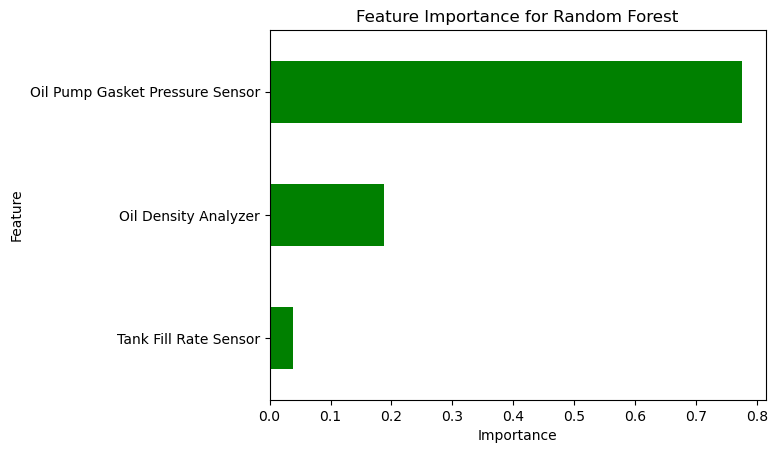

In [48]:
global_importances = pd.Series(loaded_model.feature_importances_, index=train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest")

### Logistic Regression Classifier

In [49]:
# Create a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=1)

# Define the hyperparameter search space
param_dist = {
    "penalty": ['l1', 'l2'],  # Regularization type
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
}

# Define the scoring metric
f1_scorer = make_scorer(f1_score, greater_is_better=True)

# Create a RandomizedSearchCV object
rs = RandomizedSearchCV(model, param_distributions=param_dist, random_state=1, scoring=f1_scorer, cv=3)

# Perform hyperparameter tuning
rs.fit(X_train_res, y_train_res)  # Replace X_train and y_train with your training data

# Get the best estimator and best hyperparameters
best_model = rs.best_estimator_
best_params = rs.best_params_

print("Best Hyperparameters:", best_params)
# Now you can use the best_model for prediction or further analysis

Best Hyperparameters: {'penalty': 'l1', 'C': 100}


In [50]:
# writing random forest model to disk
model_path = './'
with(open(model_path + "LogisticRegressionModel" + ".sav", "w")) as fp:
    pass
joblib.dump(best_model, open(model_path + "LogisticRegressionModel" + ".sav", "wb"))

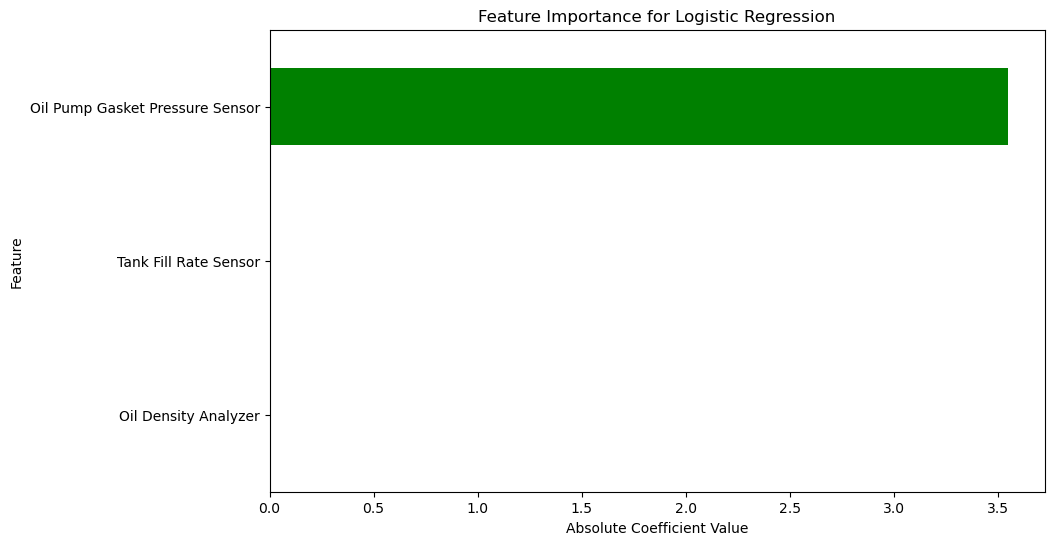

In [51]:
# Assuming you've already trained your Logistic Regression model (best_model)
coefficients = best_model.coef_[0]  # Coefficients of the features

# Create a Series with feature names as the index and coefficients as the values
feature_importances = pd.Series(coefficients, index=X_train_res.columns)

# Sort feature importances in ascending order
feature_importances_sorted = feature_importances.abs().sort_values(ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances_sorted.plot(kind='barh', color='green')
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance for Logistic Regression")
plt.show()

## Working with test data now

In [52]:
import pandas as pd
import numpy as np
import pickle
import joblib
from sklearn.metrics import f1_score, make_scorer

In [53]:
test = pd.read_csv('sensor_test_master.csv')
test

,Unnamed: 0,timestamp,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,...,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor,status
0,217059,2018-08-29 17:39:00,2.436863,48.394100,52.734371,44.878471,628.512700,82.59187,14.937790,16.652200,...,41.40625,50.636570,53.240740,64.236110,46.006940,279.513900,96.932870,NaN,223.090300,0
1,135724,2018-07-04 06:04:00,0.001968,37.196178,34.592014,38.237850,203.220474,0.00000,0.028935,0.036169,...,55.20833,29.513889,30.381945,39.062500,38.773148,27.488426,27.777779,28.067129,28.067129,1
2,51574,2018-05-06 19:34:00,2.453588,49.218750,54.210068,46.918400,636.689800,72.41217,13.556130,16.210940,...,40.10416,48.900460,45.138890,46.875000,41.666670,185.763900,65.104160,231.770800,199.942100,0
3,49462,2018-05-05 08:22:00,2.455556,46.484380,51.258680,44.010414,639.583400,80.97032,13.201680,16.131360,...,39.06250,32.986111,36.168980,37.615742,36.458332,175.347200,54.687500,231.192100,203.125000,0
4,184399,2018-08-07 01:19:00,2.451620,49.001736,51.822914,44.227430,632.060181,66.86974,15.089700,16.702840,...,52.60416,46.585650,55.266200,87.094910,51.793980,153.356500,52.662040,NaN,169.560200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44059,179089,2018-08-03 08:49:00,2.453588,48.394096,49.652770,44.531250,639.004639,64.54141,14.648440,16.753470,...,44.27083,40.798610,40.219910,56.423610,42.534720,277.777800,58.159721,NaN,201.678200,0
44060,135843,2018-07-04 08:03:00,0.001968,37.803820,34.939236,38.498264,201.484360,0.00000,0.028935,0.036169,...,54.68750,30.092590,30.671297,38.773150,36.747684,28.645834,28.067130,28.645834,28.935184,1
44061,42511,2018-04-30 12:31:00,2.470313,47.092010,52.083330,43.923611,632.523100,67.81093,13.505500,16.066260,...,51.30208,43.692130,46.006940,58.159720,49.479170,136.284700,60.763890,212.963000,202.835600,0
44062,5421,2018-04-04 18:21:00,2.460474,48.784720,51.432290,44.357640,637.731400,72.07818,13.411460,16.608800,...,35.41666,50.925930,36.168980,36.168980,36.168980,179.398100,53.240740,229.166700,192.708300,0


In [54]:
# method to drop duplicate rows
def drop_duplicate_rows(df):
#     logger.info('Dropping duplicate rows..')
    try:
        if len(df[df.duplicated()]) > 0:
            df.drop_duplicates(keep='first', inplace=True)

    except Exception as e:
        print("drop_duplicate_rows failed because of : {}".format(e))
#         logger.error("drop_duplicate_rows failed because of : {}".format(e))
        raise Exception("drop_duplicate_rows failed because of : {}".format(e))
    
    
# dropping duplicate rows
drop_duplicate_rows(test)

In [55]:
test_y = test.iloc[:,-1:]
test_y

,status
0,0
1,1
2,0
3,0
4,0
...,...
44059,0
44060,1
44061,0
44062,0


In [56]:
# load the column list from the file
with open('col_list_train.pkl', 'rb') as file:
    loaded_col_list = pickle.load(file)

print(loaded_col_list)

['Oil Pump Gasket Pressure Sensor', 'Oil Density Analyzer', 'Tank Fill Rate Sensor']


In [57]:
test = test.loc[:, loaded_col_list]
test

,Oil Pump Gasket Pressure Sensor,Oil Density Analyzer,Tank Fill Rate Sensor
0,8.803353,647.88190,0.000000
1,0.000000,593.49910,26.325050
2,1.660809,113.52150,82.214810
3,1.784213,201.48700,72.035290
4,15.442370,837.59590,0.124148
...,...,...,...
44059,12.446780,842.57230,0.000000
44060,0.000000,589.03280,37.729500
44061,3.165552,833.07230,114.283900
44062,1.154897,516.66240,110.590600


In [58]:
def replace_outliers_with_median_test(df):
    try:
        imputer_save_path = './'
        imputer_file = 'sensor_outlier_train_imputed.pkl'

        # Load the saved SimpleImputer object from disk
        imputer = joblib.load(open(imputer_save_path + imputer_file, "rb"))

        # Get a list of numeric columns in the test DataFrame
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

        # Initialize an empty DataFrame to store the imputed values
        df_imputed = pd.DataFrame()

        # Apply the imputer to each numeric column separately
        for col in numeric_cols:
            col_data = df[col].values.reshape(-1, 1)
            col_imputed = imputer.transform(col_data)
            df_imputed[col] = col_imputed.flatten()

    except Exception as e:
        print("replace_outliers_with_median_test failed because of : {}".format(e))
        raise Exception("replace_outliers_with_median_test failed because of : {}".format(e))

    return df_imputed

In [59]:
test_preprocessing = replace_outliers_with_median_test(test)
test_preprocessing

,Oil Pump Gasket Pressure Sensor,Oil Density Analyzer,Tank Fill Rate Sensor
0,8.803353,647.88190,0.000000
1,0.000000,593.49910,26.325050
2,1.660809,113.52150,82.214810
3,1.784213,201.48700,72.035290
4,15.442370,837.59590,0.124148
...,...,...,...
44059,12.446780,842.57230,0.000000
44060,0.000000,589.03280,37.729500
44061,3.165552,833.07230,114.283900
44062,1.154897,516.66240,110.590600


In [60]:
# Remove white spaces from column name
def remove_column_name_whitespaces(df):
#     logger.info('Removing white spaces from column name')
    try:
        df.rename(columns=lambda x: x.strip(), inplace=True)

    except Exception as e:
        print("remove_column_name_whitespaces failed because of : {}".format(e))
#         logger.error("remove_column_name_whitespaces failed because of : {}".format(e))
        raise Exception("remove_column_name_whitespaces failed because of : {}".format(e))

In [61]:
remove_column_name_whitespaces(test_preprocessing)

In [62]:
X_test_res, y_test_res = test_preprocessing.copy(), test_y.copy()

In [63]:
X_test_res

,Oil Pump Gasket Pressure Sensor,Oil Density Analyzer,Tank Fill Rate Sensor
0,8.803353,647.88190,0.000000
1,0.000000,593.49910,26.325050
2,1.660809,113.52150,82.214810
3,1.784213,201.48700,72.035290
4,15.442370,837.59590,0.124148
...,...,...,...
44059,12.446780,842.57230,0.000000
44060,0.000000,589.03280,37.729500
44061,3.165552,833.07230,114.283900
44062,1.154897,516.66240,110.590600


In [64]:
y_test_res.value_counts()

status
0         41144
1          2920
dtype: int64

In [65]:
def calculate_performance_metrics(y_test, y_pred):
#     logger.info('calculating performance metrics...')
    try:
        f1_score_calculated = (f1_score(y_test, y_pred))*100

    except Exception as e:
        print("calculate_performance_metrics failed because of : {}".format(e))
#         logger.error("calculate_performance_metrics failed because of : {}".format(e))
        raise Exception("calculate_performance_metrics failed because of : {}".format(e))

    return round(f1_score_calculated, 3)

## Random Forest Results

In [66]:
## Loading model
model = joblib.load(open('./' + "RandomForestModel.sav", "rb"))
test_preprocessing

,Oil Pump Gasket Pressure Sensor,Oil Density Analyzer,Tank Fill Rate Sensor
0,8.803353,647.88190,0.000000
1,0.000000,593.49910,26.325050
2,1.660809,113.52150,82.214810
3,1.784213,201.48700,72.035290
4,15.442370,837.59590,0.124148
...,...,...,...
44059,12.446780,842.57230,0.000000
44060,0.000000,589.03280,37.729500
44061,3.165552,833.07230,114.283900
44062,1.154897,516.66240,110.590600


In [67]:
y_pred = model.predict(X_test_res)
f1_score_calculated = calculate_performance_metrics(y_test_res, y_pred)
f1_score_calculated

92.876

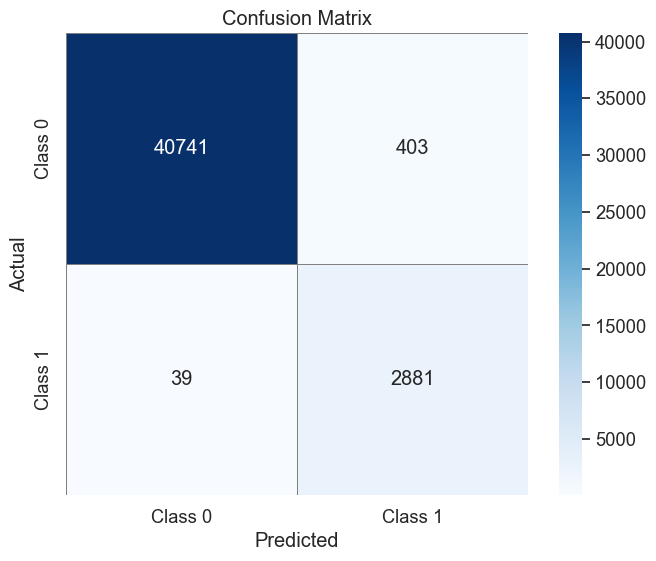

In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_res,y_pred)

# Define class labels (if you have them)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels

# Plot the heatmap
sns.heatmap(
    cm,
    annot=True,           # Annotate cells with values
    fmt='d',              # Format cells as integers
    cmap='Blues',         # Color map
    xticklabels=class_labels,
    yticklabels=class_labels,
    linewidths=0.5,
    linecolor='gray',
    square=True,
)

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set title
plt.title('Confusion Matrix')

# Show the plot
plt.show()


## Logistic Regression Results

In [69]:
## Loading model
logitmodel = joblib.load(open('./' + "LogisticRegressionModel.sav", "rb"))
y_pred = logitmodel.predict(X_test_res)
f1_score_calculated = calculate_performance_metrics(y_test_res, y_pred)
f1_score_calculated

72.06

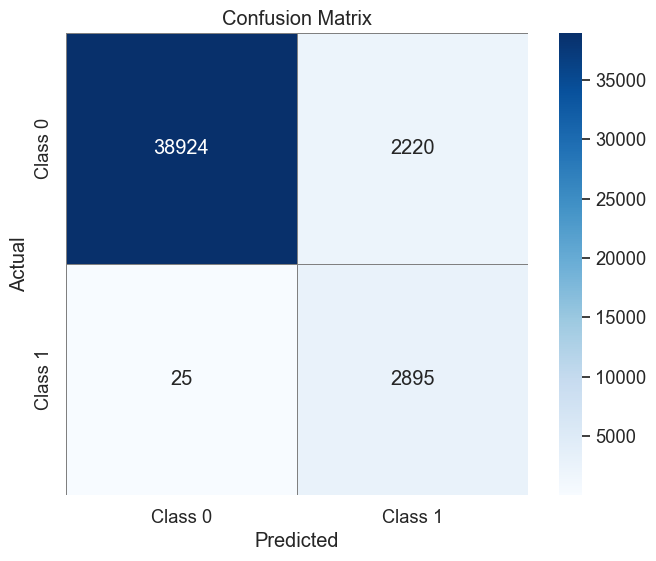

In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_res,y_pred)

# Define class labels (if you have them)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels

# Plot the heatmap
sns.heatmap(
    cm,
    annot=True,           # Annotate cells with values
    fmt='d',              # Format cells as integers
    cmap='Blues',         # Color map
    xticklabels=class_labels,
    yticklabels=class_labels,
    linewidths=0.5,
    linecolor='gray',
    square=True,
)

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set title
plt.title('Confusion Matrix')

# Show the plot
plt.show()


## Exporting Final Results to csv

- Finalising Random Forest Model

In [71]:
rforestmodel = joblib.load(open('./' + "RandomForestModel.sav", "rb"))
y_pred = rforestmodel.predict_proba(X_test_res)
y_pred

array([[0.99031717, 0.00968283],
       [0.05764659, 0.94235341],
       [0.97635814, 0.02364186],
       ...,
       [0.93314248, 0.06685752],
       [0.86524138, 0.13475862],
       [0.97923617, 0.02076383]])

In [72]:
# Extract the second value from each row and create a list
probability_of_failure = [row[1]*100 for row in y_pred]

# Create a DataFrame from the extracted values
probability_of_failure_df = pd.DataFrame({'Chances of Failure': probability_of_failure})

# Display the DataFrame
print(probability_of_failure_df)

       Chances of Failure
0                0.968283
1               94.235341
2                2.364186
3                2.515993
4                0.649200
...                   ...
44059            0.271412
44060           94.270651
44061            6.685752
44062           13.475862
44063            2.076383

[44064 rows x 1 columns]


In [73]:
probability_of_failure_df

,Chances of Failure
0,0.968283
1,94.235341
2,2.364186
3,2.515993
4,0.649200
...,...
44059,0.271412
44060,94.270651
44061,6.685752
44062,13.475862


In [74]:
test_df = pd.read_csv('sensor_test_master.csv')
test_df

,Unnamed: 0,timestamp,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,...,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor,status
0,217059,2018-08-29 17:39:00,2.436863,48.394100,52.734371,44.878471,628.512700,82.59187,14.937790,16.652200,...,41.40625,50.636570,53.240740,64.236110,46.006940,279.513900,96.932870,NaN,223.090300,0
1,135724,2018-07-04 06:04:00,0.001968,37.196178,34.592014,38.237850,203.220474,0.00000,0.028935,0.036169,...,55.20833,29.513889,30.381945,39.062500,38.773148,27.488426,27.777779,28.067129,28.067129,1
2,51574,2018-05-06 19:34:00,2.453588,49.218750,54.210068,46.918400,636.689800,72.41217,13.556130,16.210940,...,40.10416,48.900460,45.138890,46.875000,41.666670,185.763900,65.104160,231.770800,199.942100,0
3,49462,2018-05-05 08:22:00,2.455556,46.484380,51.258680,44.010414,639.583400,80.97032,13.201680,16.131360,...,39.06250,32.986111,36.168980,37.615742,36.458332,175.347200,54.687500,231.192100,203.125000,0
4,184399,2018-08-07 01:19:00,2.451620,49.001736,51.822914,44.227430,632.060181,66.86974,15.089700,16.702840,...,52.60416,46.585650,55.266200,87.094910,51.793980,153.356500,52.662040,NaN,169.560200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44059,179089,2018-08-03 08:49:00,2.453588,48.394096,49.652770,44.531250,639.004639,64.54141,14.648440,16.753470,...,44.27083,40.798610,40.219910,56.423610,42.534720,277.777800,58.159721,NaN,201.678200,0
44060,135843,2018-07-04 08:03:00,0.001968,37.803820,34.939236,38.498264,201.484360,0.00000,0.028935,0.036169,...,54.68750,30.092590,30.671297,38.773150,36.747684,28.645834,28.067130,28.645834,28.935184,1
44061,42511,2018-04-30 12:31:00,2.470313,47.092010,52.083330,43.923611,632.523100,67.81093,13.505500,16.066260,...,51.30208,43.692130,46.006940,58.159720,49.479170,136.284700,60.763890,212.963000,202.835600,0
44062,5421,2018-04-04 18:21:00,2.460474,48.784720,51.432290,44.357640,637.731400,72.07818,13.411460,16.608800,...,35.41666,50.925930,36.168980,36.168980,36.168980,179.398100,53.240740,229.166700,192.708300,0


In [75]:
test_df = test_df.iloc[:,:-1]
test_df

,Unnamed: 0,timestamp,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,...,Oil Moisture Sensor,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor
0,217059,2018-08-29 17:39:00,2.436863,48.394100,52.734371,44.878471,628.512700,82.59187,14.937790,16.652200,...,34.895830,41.40625,50.636570,53.240740,64.236110,46.006940,279.513900,96.932870,NaN,223.090300
1,135724,2018-07-04 06:04:00,0.001968,37.196178,34.592014,38.237850,203.220474,0.00000,0.028935,0.036169,...,36.197910,55.20833,29.513889,30.381945,39.062500,38.773148,27.488426,27.777779,28.067129,28.067129
2,51574,2018-05-06 19:34:00,2.453588,49.218750,54.210068,46.918400,636.689800,72.41217,13.556130,16.210940,...,35.677080,40.10416,48.900460,45.138890,46.875000,41.666670,185.763900,65.104160,231.770800,199.942100
3,49462,2018-05-05 08:22:00,2.455556,46.484380,51.258680,44.010414,639.583400,80.97032,13.201680,16.131360,...,31.250000,39.06250,32.986111,36.168980,37.615742,36.458332,175.347200,54.687500,231.192100,203.125000
4,184399,2018-08-07 01:19:00,2.451620,49.001736,51.822914,44.227430,632.060181,66.86974,15.089700,16.702840,...,35.156250,52.60416,46.585650,55.266200,87.094910,51.793980,153.356500,52.662040,NaN,169.560200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44059,179089,2018-08-03 08:49:00,2.453588,48.394096,49.652770,44.531250,639.004639,64.54141,14.648440,16.753470,...,35.156250,44.27083,40.798610,40.219910,56.423610,42.534720,277.777800,58.159721,NaN,201.678200
44060,135843,2018-07-04 08:03:00,0.001968,37.803820,34.939236,38.498264,201.484360,0.00000,0.028935,0.036169,...,38.020832,54.68750,30.092590,30.671297,38.773150,36.747684,28.645834,28.067130,28.645834,28.935184
44061,42511,2018-04-30 12:31:00,2.470313,47.092010,52.083330,43.923611,632.523100,67.81093,13.505500,16.066260,...,38.020830,51.30208,43.692130,46.006940,58.159720,49.479170,136.284700,60.763890,212.963000,202.835600
44062,5421,2018-04-04 18:21:00,2.460474,48.784720,51.432290,44.357640,637.731400,72.07818,13.411460,16.608800,...,30.989580,35.41666,50.925930,36.168980,36.168980,36.168980,179.398100,53.240740,229.166700,192.708300


In [76]:
final_test_results = pd.concat([test_df,probability_of_failure_df], axis=1)
final_test_results

,Unnamed: 0,timestamp,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,...,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor,Chances of Failure
0,217059,2018-08-29 17:39:00,2.436863,48.394100,52.734371,44.878471,628.512700,82.59187,14.937790,16.652200,...,41.40625,50.636570,53.240740,64.236110,46.006940,279.513900,96.932870,NaN,223.090300,0.968283
1,135724,2018-07-04 06:04:00,0.001968,37.196178,34.592014,38.237850,203.220474,0.00000,0.028935,0.036169,...,55.20833,29.513889,30.381945,39.062500,38.773148,27.488426,27.777779,28.067129,28.067129,94.235341
2,51574,2018-05-06 19:34:00,2.453588,49.218750,54.210068,46.918400,636.689800,72.41217,13.556130,16.210940,...,40.10416,48.900460,45.138890,46.875000,41.666670,185.763900,65.104160,231.770800,199.942100,2.364186
3,49462,2018-05-05 08:22:00,2.455556,46.484380,51.258680,44.010414,639.583400,80.97032,13.201680,16.131360,...,39.06250,32.986111,36.168980,37.615742,36.458332,175.347200,54.687500,231.192100,203.125000,2.515993
4,184399,2018-08-07 01:19:00,2.451620,49.001736,51.822914,44.227430,632.060181,66.86974,15.089700,16.702840,...,52.60416,46.585650,55.266200,87.094910,51.793980,153.356500,52.662040,NaN,169.560200,0.649200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44059,179089,2018-08-03 08:49:00,2.453588,48.394096,49.652770,44.531250,639.004639,64.54141,14.648440,16.753470,...,44.27083,40.798610,40.219910,56.423610,42.534720,277.777800,58.159721,NaN,201.678200,0.271412
44060,135843,2018-07-04 08:03:00,0.001968,37.803820,34.939236,38.498264,201.484360,0.00000,0.028935,0.036169,...,54.68750,30.092590,30.671297,38.773150,36.747684,28.645834,28.067130,28.645834,28.935184,94.270651
44061,42511,2018-04-30 12:31:00,2.470313,47.092010,52.083330,43.923611,632.523100,67.81093,13.505500,16.066260,...,51.30208,43.692130,46.006940,58.159720,49.479170,136.284700,60.763890,212.963000,202.835600,6.685752
44062,5421,2018-04-04 18:21:00,2.460474,48.784720,51.432290,44.357640,637.731400,72.07818,13.411460,16.608800,...,35.41666,50.925930,36.168980,36.168980,36.168980,179.398100,53.240740,229.166700,192.708300,13.475862


In [77]:
final_test_results = final_test_results.sort_values(by='Chances of Failure',ascending=False)
final_test_results

,Unnamed: 0,timestamp,Pressure Sensor,Oil Pressure Switch,Level Sensor,Temperature Sensor,Oil Quality Sensor,Flow Sensor,Oil Filter Differential Pressure Sensor,Oil Pump RPM Sensor,...,Tank Vibration Sensor,Tank Overfill Sensor,Oil Agitation Sensor,Oil Filtration Sensor,Tank Mixing Sensor,Oil Pressure Regulator,Tank Level Indicator,Oil Containment Sensor,Tank Cleaning Sensor,Chances of Failure
12747,128721,2018-06-29 09:21:00,NaN,40.104160,41.059020,39.973960,200.714706,99.20007,10.12008,12.601273,...,29.687498,30.381940,30.960650,30.671297,31.539352,30.381945,30.671297,33.854170,NaN,99.819834
17498,128719,2018-06-29 09:19:00,NaN,40.407990,41.059020,40.190970,202.641769,67.02245,10.06221,12.601273,...,29.687498,30.671297,30.960648,30.671297,31.539352,30.381945,30.671297,33.854170,NaN,99.819834
37312,128723,2018-06-29 09:23:00,NaN,40.190970,41.015630,39.973957,200.714691,99.98177,10.09838,12.622970,...,29.687498,30.671300,30.960650,30.671297,31.539352,30.381945,30.671297,33.854168,NaN,99.819834
31937,128724,2018-06-29 09:24:00,NaN,40.190970,40.972220,39.973960,201.021393,99.99721,10.12731,12.601270,...,29.687498,30.381940,30.960648,30.671297,31.539352,30.381940,30.671297,33.854168,NaN,99.693894
34277,128556,2018-06-29 06:36:00,0.003935,40.538190,41.319443,39.713540,202.798035,0.00000,10.08391,12.601270,...,26.041670,27.488430,27.777780,28.067129,29.224540,28.645830,28.935184,31.539352,NaN,99.693894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37541,206082,2018-08-22 02:42:00,2.500810,47.960068,51.258678,45.095486,631.365723,60.26649,14.67737,16.124130,...,48.177080,46.875000,46.585650,68.287030,43.692130,347.222200,105.902800,NaN,239.0046,0.088877
12673,184484,2018-08-07 02:44:00,2.453588,49.305550,52.083330,44.487846,621.296265,68.85190,14.96672,16.652200,...,48.437500,38.194440,38.773150,41.666670,41.956020,196.469900,61.053240,NaN,196.7593,0.088877
16593,179934,2018-08-03 22:54:00,2.451620,44.053818,47.135414,43.142361,638.773132,70.99334,14.60503,16.167530,...,38.802080,47.743060,37.615740,43.402780,52.662040,155.960600,59.606480,NaN,213.8310,0.088877
5728,178856,2018-08-03 04:56:00,2.455556,47.048610,48.914930,44.661457,629.861084,68.95348,14.36632,16.471350,...,40.625000,35.300930,36.458330,42.245370,37.326389,224.537000,50.636574,NaN,188.0787,0.088877


In [79]:
final_test_results.to_csv("Results.csv", index=False)